In [88]:
import numpy as np
import pandas as pd


df = pd.read_csv("madfhantr.csv")
df 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [89]:
#label encoding 
df['Loan_Status'] = df['Loan_Status'].map( {'Y':1 , 'N':0} )

In [90]:
df.dropna(inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [91]:
x = df.iloc[ : , 6:11 ].values
x

array([[4.583e+03, 1.508e+03, 1.280e+02, 3.600e+02, 1.000e+00],
       [3.000e+03, 0.000e+00, 6.600e+01, 3.600e+02, 1.000e+00],
       [2.583e+03, 2.358e+03, 1.200e+02, 3.600e+02, 1.000e+00],
       ...,
       [8.072e+03, 2.400e+02, 2.530e+02, 3.600e+02, 1.000e+00],
       [7.583e+03, 0.000e+00, 1.870e+02, 3.600e+02, 1.000e+00],
       [4.583e+03, 0.000e+00, 1.330e+02, 3.600e+02, 0.000e+00]])

In [92]:
y = df['Loan_Status']
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [93]:
# cross validation 
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split( x , y , random_state=0 , test_size=0.25 )


In [94]:
from sklearn.tree import DecisionTreeClassifier

#object 
classify = DecisionTreeClassifier()

In [95]:
classify.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [96]:
ypred = classify.predict( xtest )

In [97]:
ypred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [98]:
res = pd.DataFrame( {
    'actual':ytest,
    'predicted':ypred
})

In [99]:
res

,actual,predicted
18,0,1
161,0,1
182,1,0
340,0,1
216,0,0
...,...,...
593,1,1
253,1,1
200,1,1
280,0,1


In [107]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score

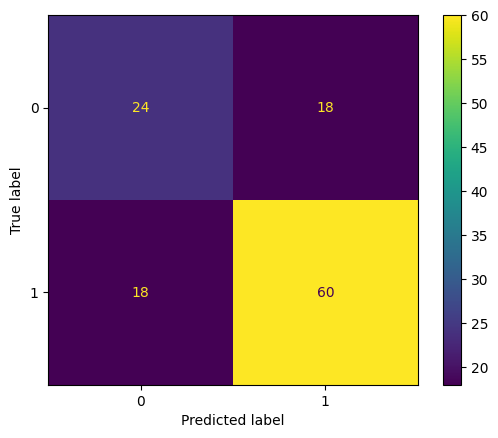

In [113]:
import matplotlib.pyplot as plt

dis = ConfusionMatrixDisplay( confusion_matrix(ytest , ypred) )
dis.plot()
plt.show()

In [102]:
print( classification_report(ytest, ypred) )

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        42
           1       0.77      0.77      0.77        78

    accuracy                           0.70       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.70      0.70      0.70       120



In [103]:
accuracy_score(ytest , ypred)

0.7